<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2 as cv
import os
from skimage import measure, morphology, segmentation
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import scipy.ndimage as ndimage
import pydicom
import plotly.graph_objects as go
from mpl_toolkits import mplot3d

#For further processing, intensity = -2000 is assigned for background 

In [2]:
def print3d(image, s):
    #storing the grid size for 3d plot
    x, y = np.mgrid[0:image.shape[0], 0:image.shape[1]]
    fig = plt.figure(figsize = (7,7))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, image, cmap='viridis', edgecolor='none')
    ax.set_title('%s image Surface plot '%s)
    plt.show()

In [3]:
def print2d(image, s):
    plt.imshow(image, cmap = 'gray')
    plt.title('%s image'%s)
    plt.show()
    print('{} image pixel range'.format(s))
    print('Max value : ',np.max(image))
    print('Min value : ',np.min(image))

In [4]:
def convert_hounsfield(image):
    image_h = image
    image_h[image_h == -2000] = 0
    intercept = dicom_file.RescaleIntercept
    slope = dicom_file.RescaleSlope

    if slope != 1:
        image_h = slope * image.astype(np.float64)
        image_h = image.astype(np.int16)

    image_h = image_h + np.int16(intercept)
    test_patient_images = np.array(image_h, dtype = np.int16)
    
    print2d(test_patient_images, 'Hounsfield')
    print3d(test_patient_images, 'Hounsfield')
    return test_patient_images

In [5]:
def internal_marker_func(image_h):
    marker_internal = image_h < -400
    print2d(marker_internal, 'Lung values')
    
    #extracting only the lung region
    marker_internal = segmentation.clear_border(marker_internal)
    plt.imshow(marker_internal)
    print2d(marker_internal, 'Extracted lung')
    
    marker_internal_labels = measure.label(marker_internal)
    areas = [r.area for r in measure.regionprops(marker_internal_labels)]
    areas.sort()
    if len(areas) > 2:
        for region in measure.regionprops(marker_internal_labels):
            if region.area < areas[-2]:
                for coordinates in region.coords:
                    marker_internal_labels[coordinates[0],coordinates[1]] = 0
    marker_internal = marker_internal_labels > 0
    print2d(marker_internal, 'Final extracted lung')
    return marker_internal

In [6]:
def watershed_segmentation(image):
    #converting to pixel array
    image = dicom_file.pixel_array
    image = image.astype(np.uint16)
    
    #Original image 2d & 3d plot
    print2d(image, 'Dicom')
    print3d(image, 'Dicom')
    
    #Converting to hounsfield values
    image_h = convert_hounsfield(image)
    marker_internal = internal_marker_func(image_h)

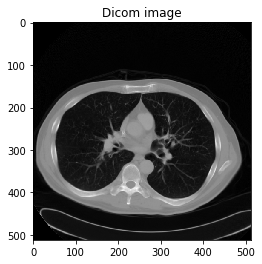

Dicom image pixel range
Max value :  1918
Min value :  0


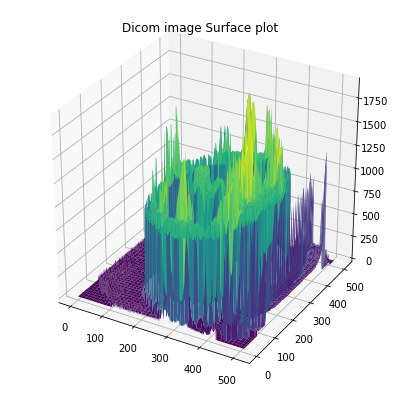

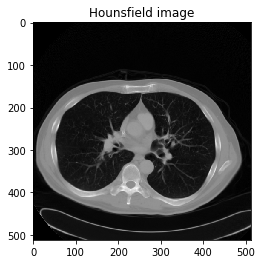

Hounsfield image pixel range
Max value :  894
Min value :  -1024


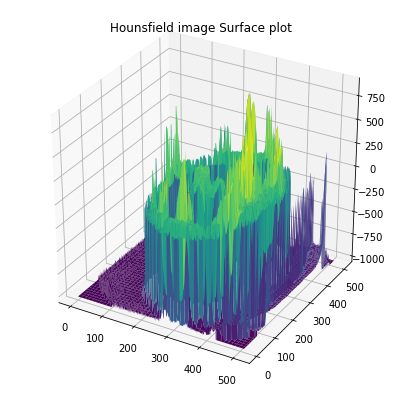

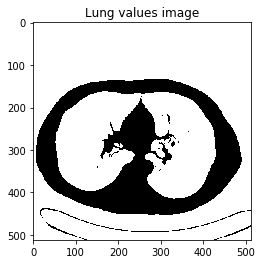

Lung values image pixel range
Max value :  True
Min value :  False


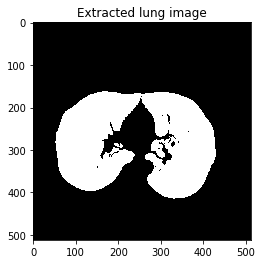

Extracted lung image pixel range
Max value :  True
Min value :  False


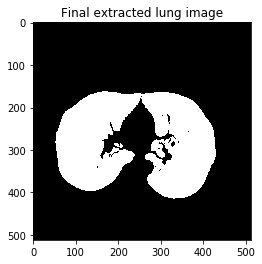

Final extracted lung image pixel range
Max value :  True
Min value :  False


In [7]:
dicom_file = pydicom.dcmread('/Users/rt/Desktop/College/4th year/sem 7/Project/Literature survey/Dicom/dicom/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')
watershed_segmentation(dicom_file)